In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


from scipy import stats
import statsmodels.api as sm


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder


pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",200)

In [20]:
leads = pd.read_csv("Leads.csv")

In [21]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [22]:
leads.shape

(9240, 37)

In [23]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [24]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [25]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [26]:
leads.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [27]:
for c in leads.columns:
    if leads[c].isnull().sum()>3000:
        leads.drop(c, axis=1,inplace=True)

In [28]:
leads.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

In [29]:
leads['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [30]:
leads.drop(['City'], axis = 1, inplace = True)

In [31]:
leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [32]:
leads.drop(['Country'], axis = 1, inplace = True)

In [33]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [34]:
leads.isnull().sum().sort_values(ascending=False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
X Education Forums                                  0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
Prospect ID                 

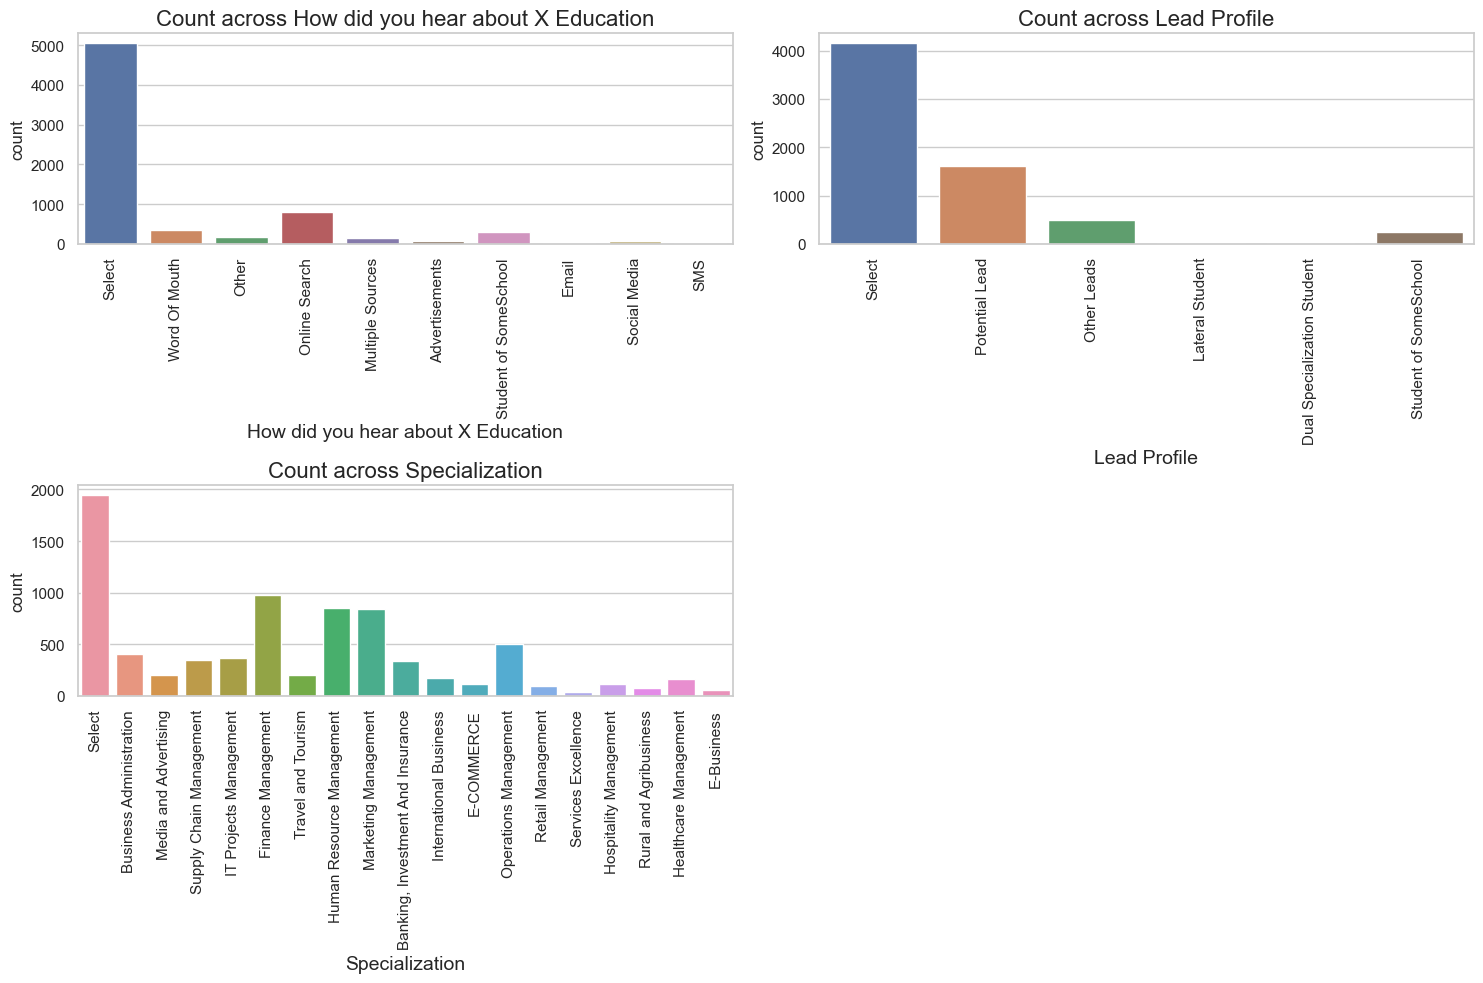

In [35]:
def countplot(x, fig):
    plt.subplot(2,2, fig)
    sns.countplot(leads[x])
    plt.title('Count across'+' '+ x, size = 16)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(15,10))

countplot('How did you hear about X Education',1)
countplot('Lead Profile',2)
countplot('Specialization',3)



plt.tight_layout()

In [36]:
for c in leads:
    print(leads[c].astype('category').value_counts())
    print('___________________________________________________')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

In [37]:
leads['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [38]:
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [39]:
leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

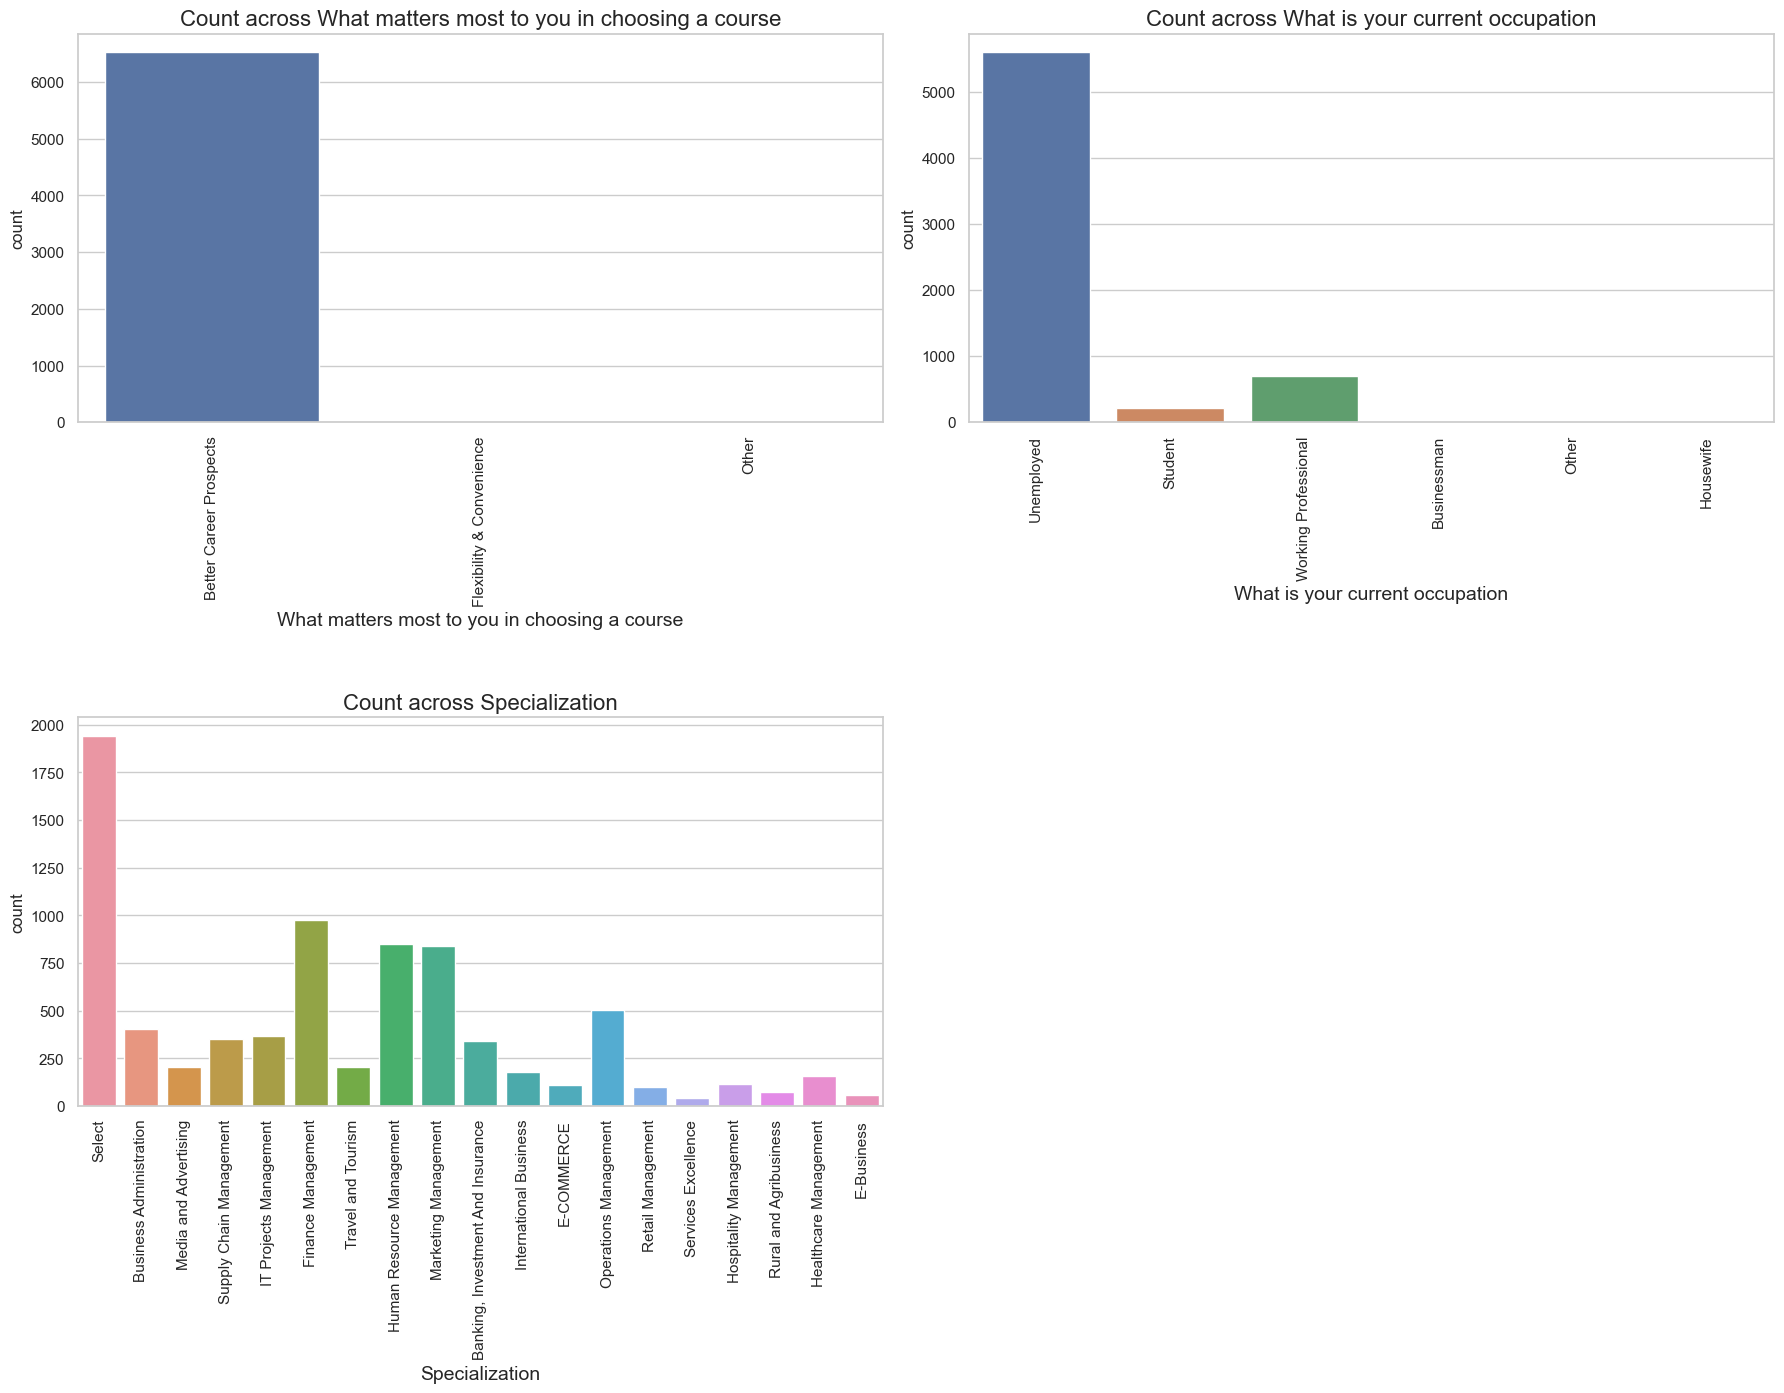

In [40]:
def countplot(x, fig):
    plt.subplot(4,2, fig)
    sns.countplot(leads[x])
    plt.title('Count across'+' '+ x, size = 16)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(18,25))


countplot('What matters most to you in choosing a course',1)
countplot('What is your current occupation',2)
countplot('Specialization',3)

plt.tight_layout()

In [41]:
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

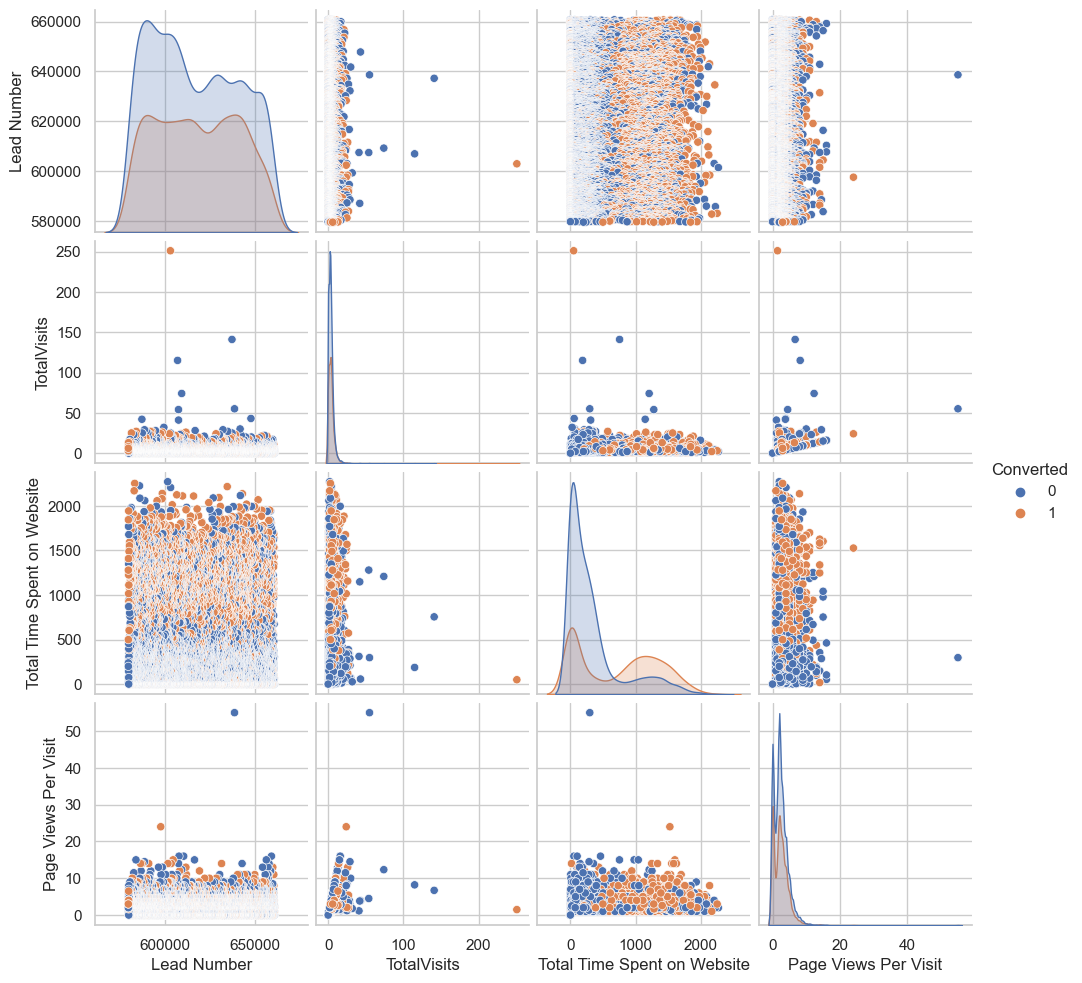

In [42]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(leads,diag_kind='kde',hue='Converted')
plt.show()

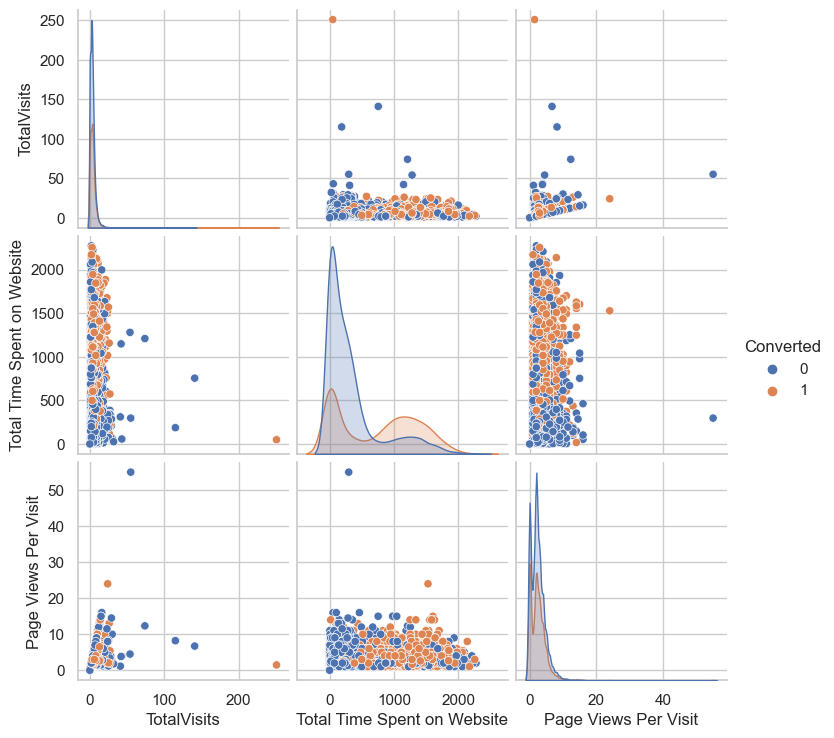

In [43]:
x_edu = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(x_edu,diag_kind='kde',hue='Converted')
plt.show()

In [44]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformedx_edu = pd.DataFrame(pt.fit_transform(x_edu))
transformedx_edu.columns = x_edu.columns
transformedx_edu.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-1.457907,-1.473767,-1.454706,-0.791863
1,0.747918,0.729628,0.308534,-0.791863
2,-0.141636,1.306093,0.065574,1.262845
3,-0.640428,0.264936,-0.536967,-0.791863
4,-0.141636,1.252499,-0.536967,1.262845


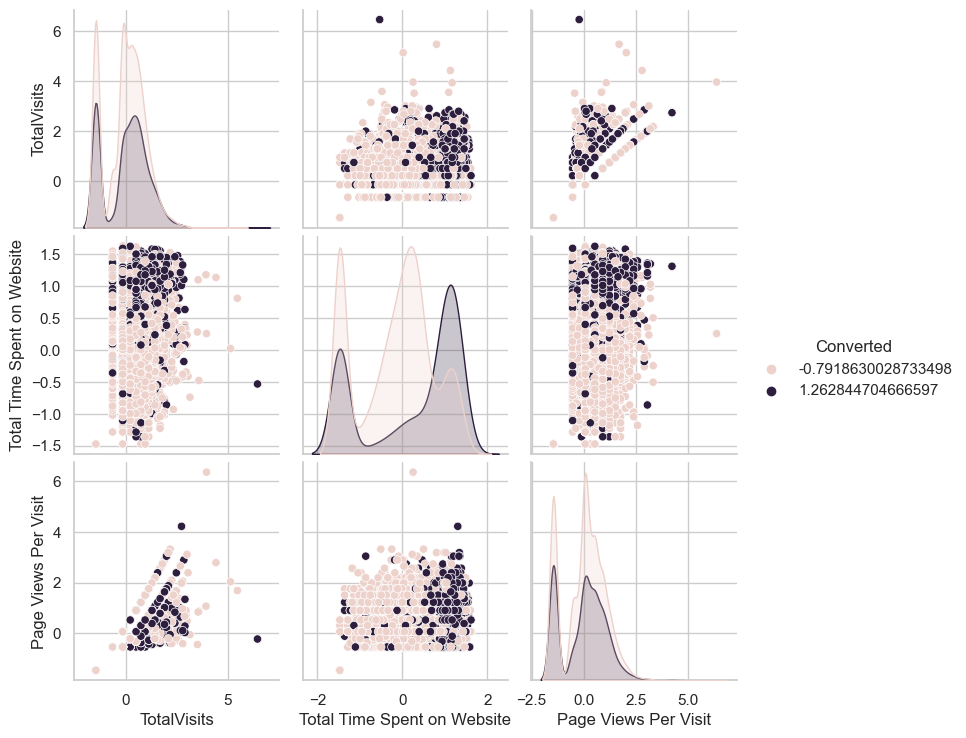

In [45]:
sns.pairplot(transformedx_edu,diag_kind='kde',hue='Converted')
plt.show()

In [46]:
leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [47]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [48]:
leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [49]:
leads.isnull().sum().sort_values(ascending=False)

What is your current occupation           2690
Specialization                            1438
TotalVisits                                137
Page Views Per Visit                       137
Last Activity                              103
Lead Source                                 36
Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Do Not Email                                 0
Converted                                    0
Total Time Spent on Website                  0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [50]:
leads = leads[~pd.isnull(leads['What is your current occupation'])]

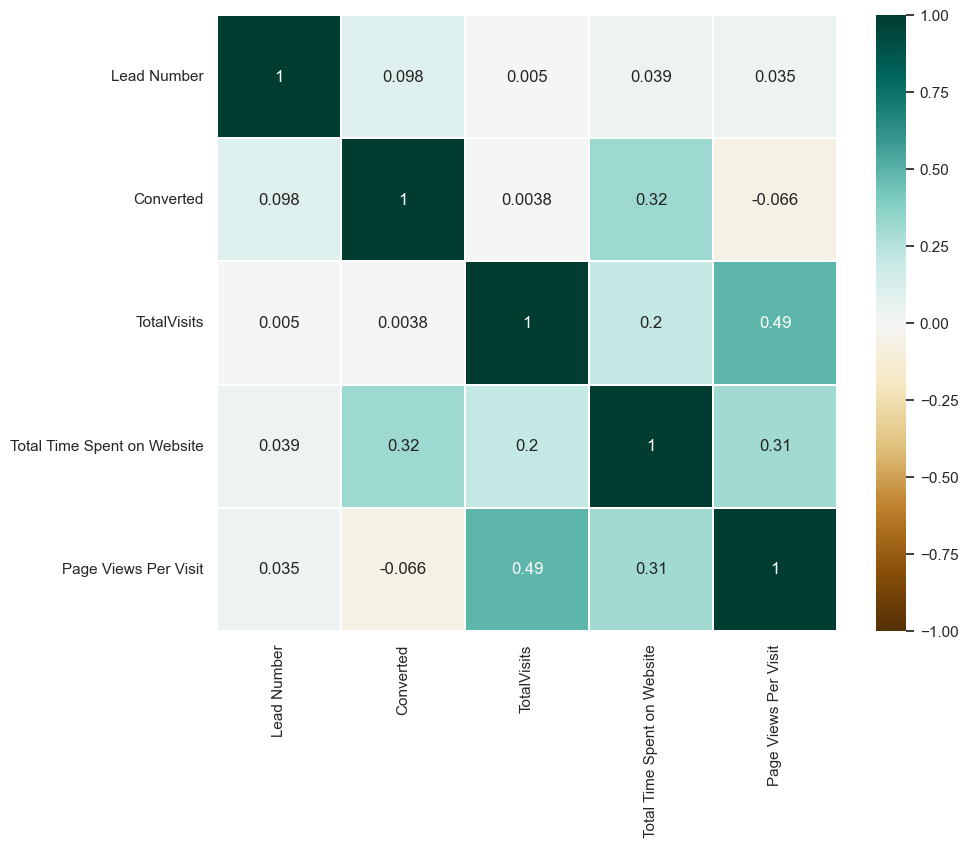

In [51]:
# Observing Correlation
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads.corr(), annot=True,cmap="BrBG", robust=True,linewidth=0.1, vmin=-1 )
plt.show()

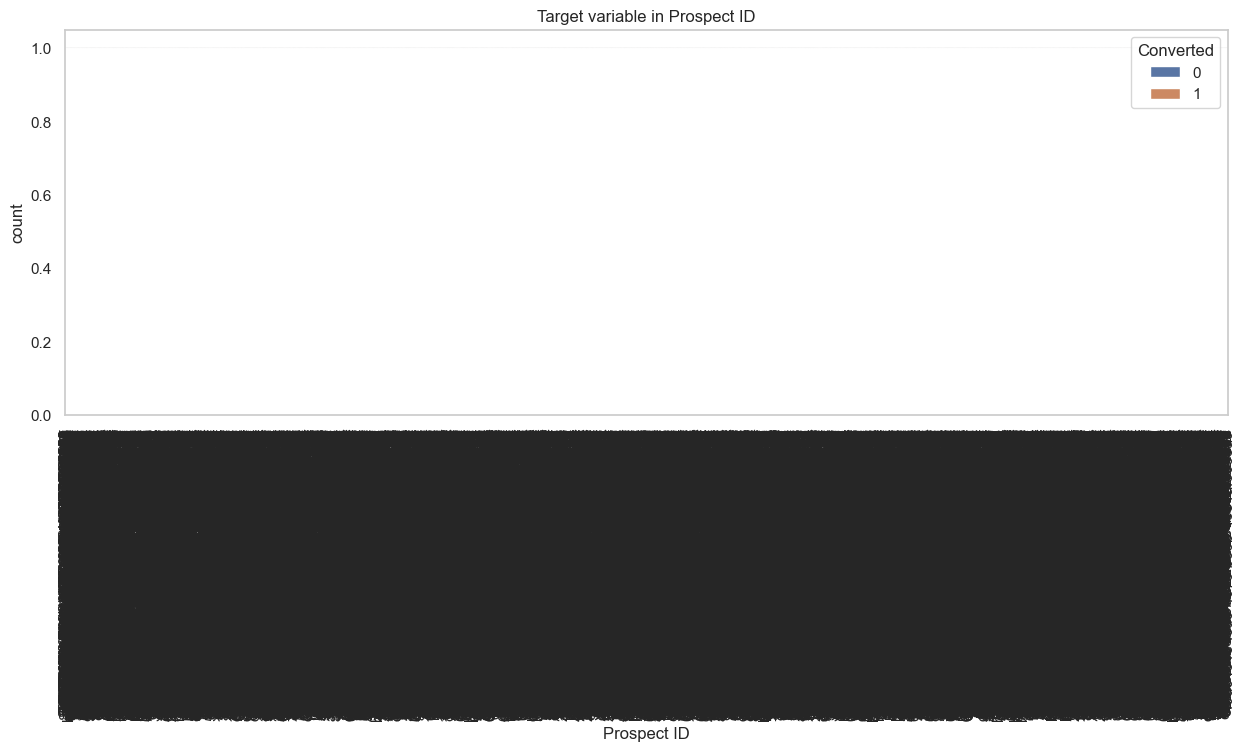

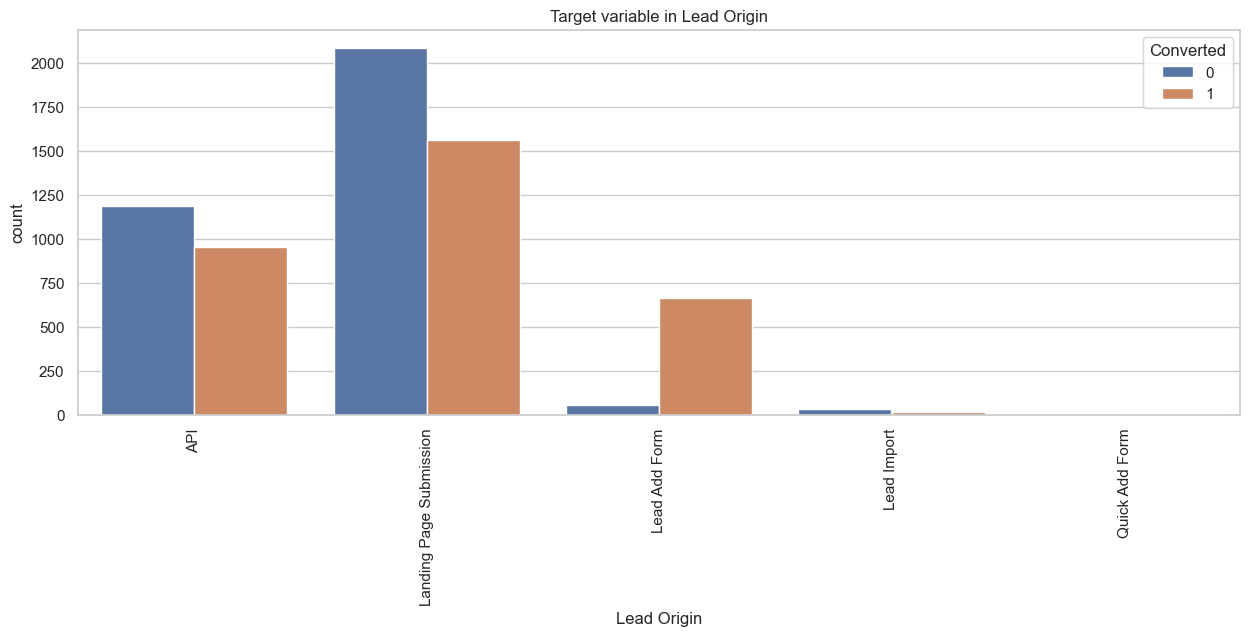

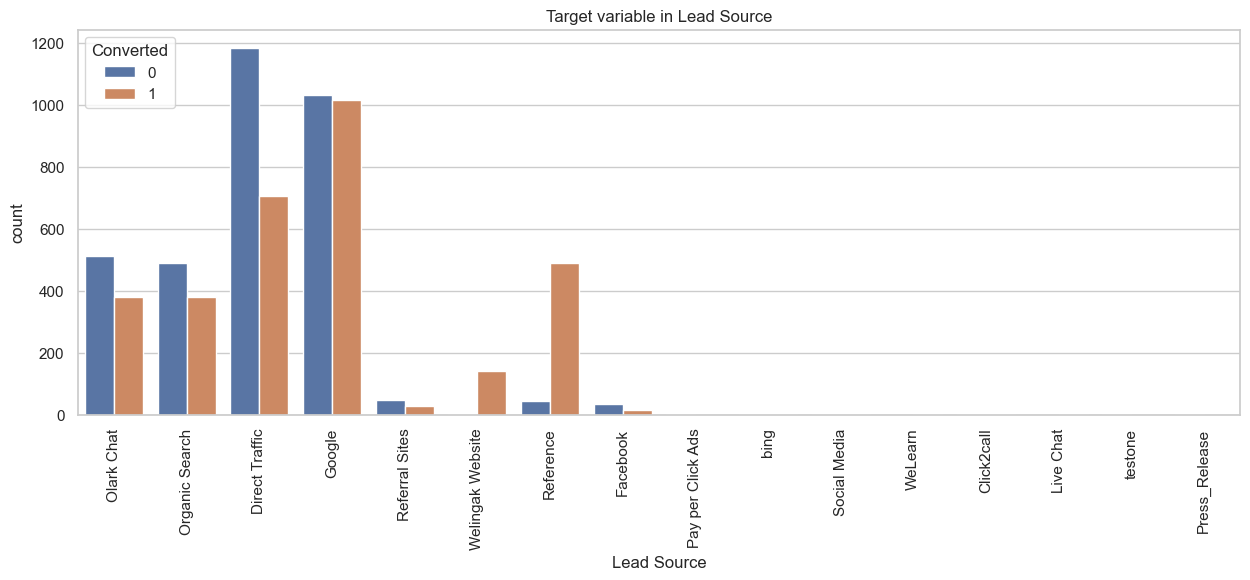

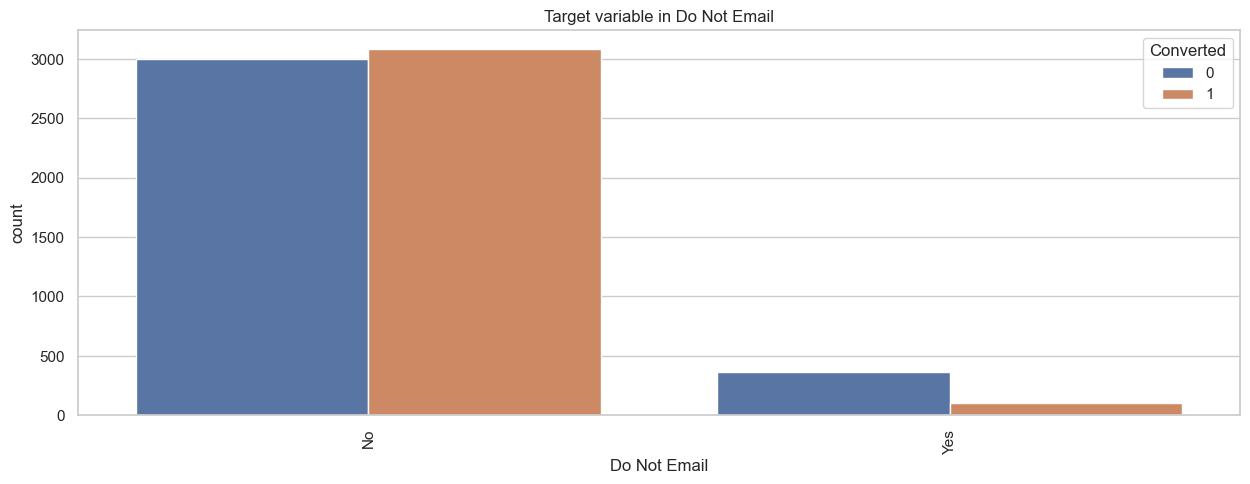

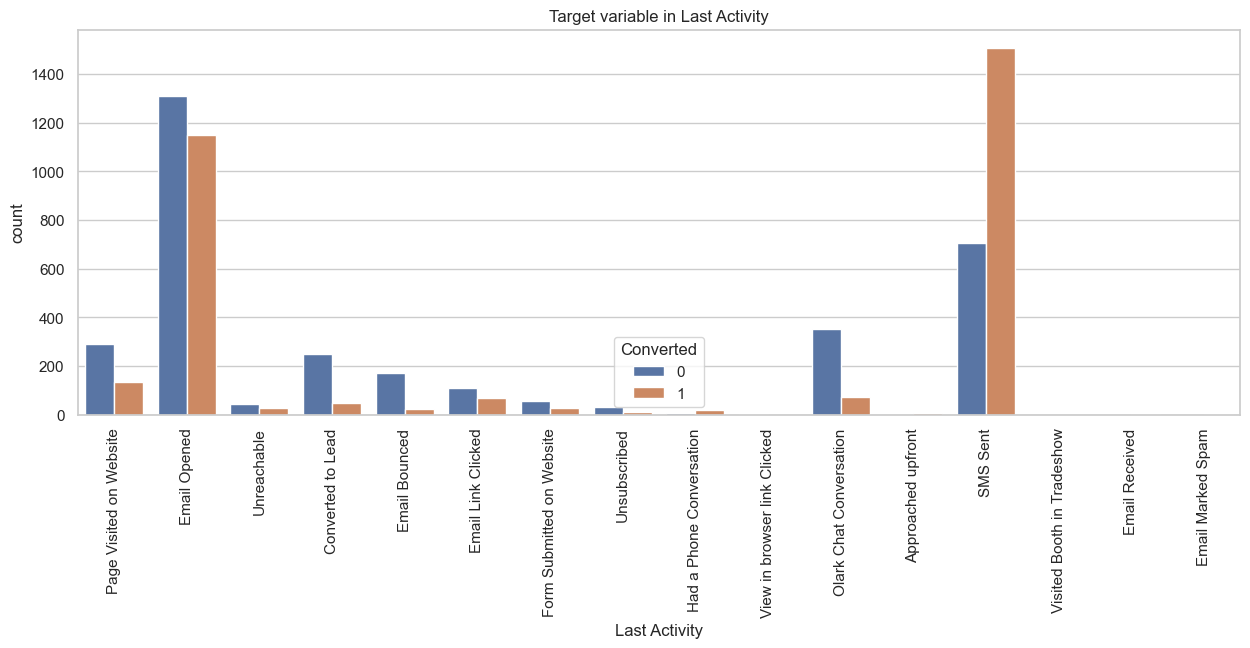

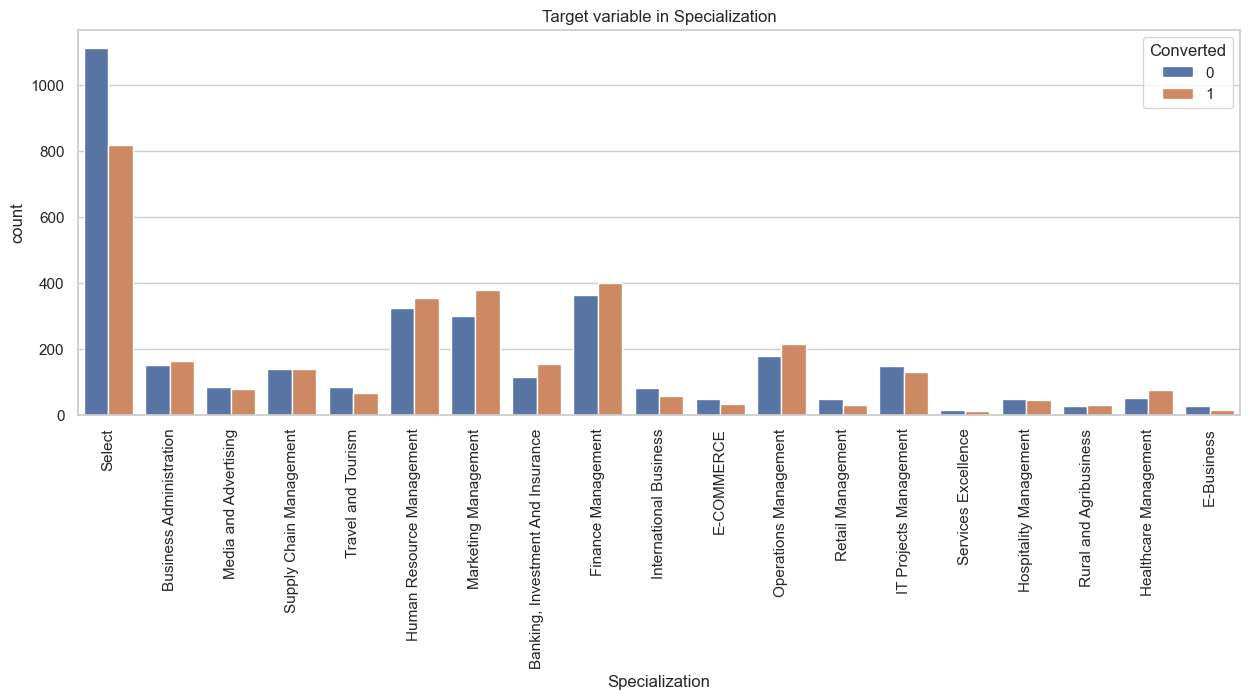

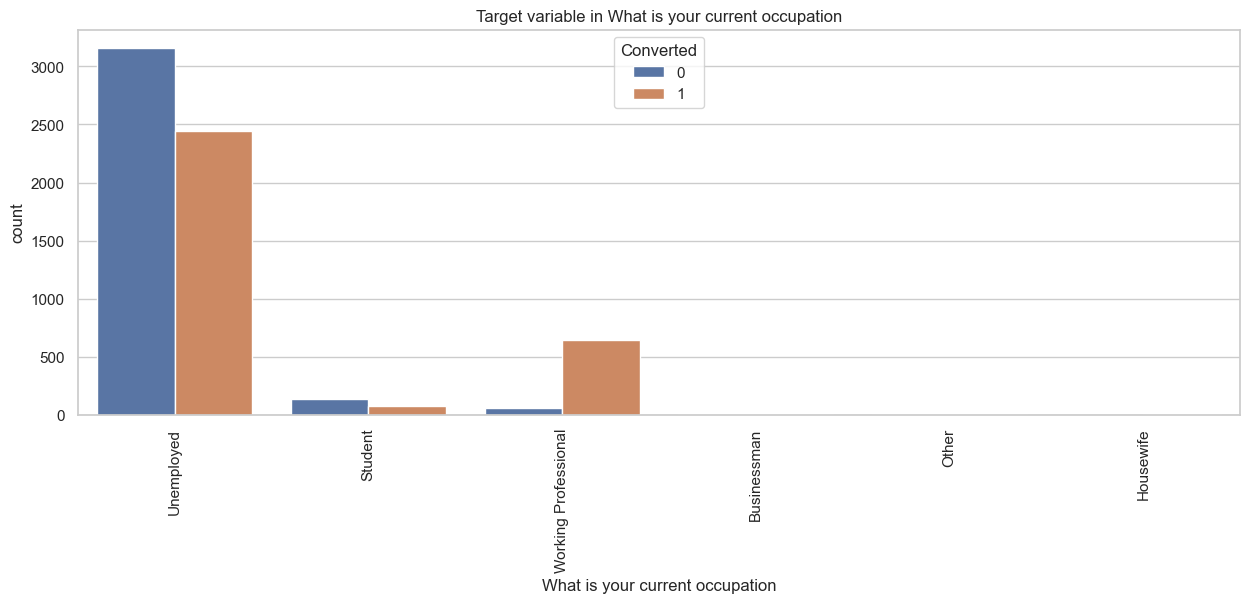

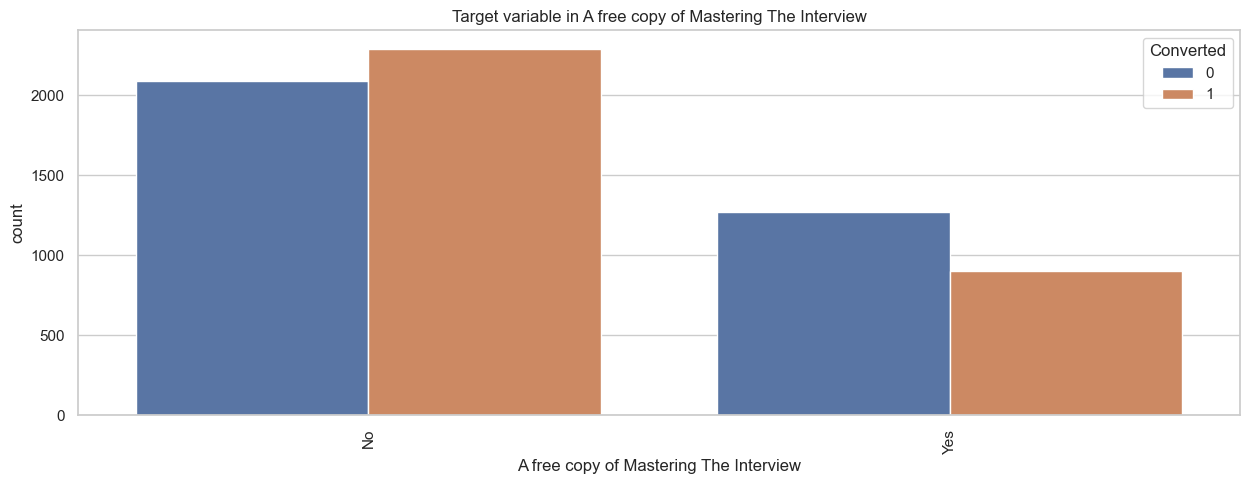

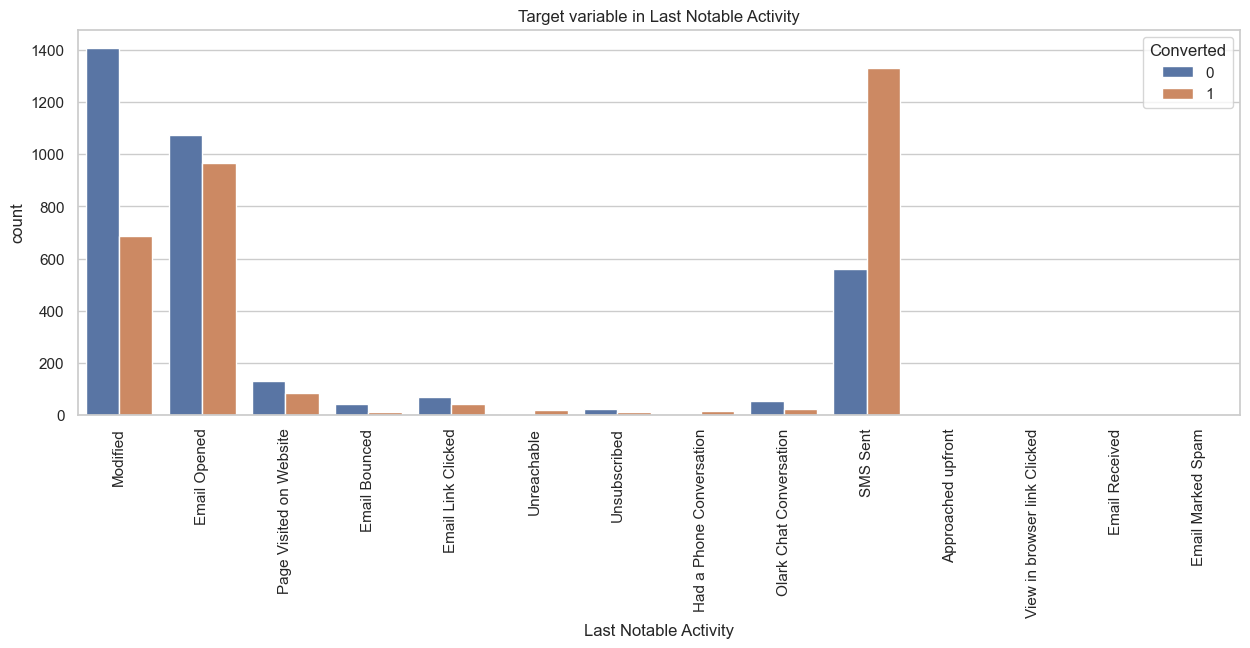

In [52]:
conv = leads.select_dtypes(include ="object").columns
for i in conv:
    
    plt.figure(figsize =(15,5))
    sns.countplot(leads[i], hue=leads.Converted)
    plt.xticks(rotation = 90)
    plt.title('Target variable in'+' '+ i)
    plt.xlabel(i)
    plt.show()

In [54]:
leads.isnull().sum().sort_values(ascending=False)

TotalVisits                               130
Page Views Per Visit                      130
Last Activity                             103
Lead Source                                36
Specialization                             18
Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Do Not Email                                0
Converted                                   0
Total Time Spent on Website                 0
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [55]:
leads = leads[~pd.isnull(leads['TotalVisits'])]

In [56]:
leads.isnull().sum().sort_values(ascending=False)

Lead Source                               29
Specialization                            18
Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [57]:
leads = leads[~pd.isnull(leads['Lead Source'])]

In [58]:
leads.isnull().sum().sort_values(ascending=False)

Specialization                            18
Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [59]:
leads = leads[~pd.isnull(leads['Specialization'])]

In [60]:
leads.isnull().sum().sort_values(ascending=False)

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [61]:
print(len(leads.index))
print(len(leads.index)/9240)

6373
0.6897186147186147


In [62]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [63]:
leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [64]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [65]:
temp = leads.loc[:, leads.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [66]:
df = pd.DataFrame({'P': ['p', 'q', 'p']})
df

,P
0,p
1,q
2,p


In [67]:
pd.get_dummies(df)

,P_p,P_q
0,1,0
1,0,1
2,1,0


In [68]:
pd.get_dummies(df, prefix=['col1'])

,col1_p,col1_q
0,1,0
1,0,1
2,1,0


In [69]:
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

leads = pd.concat([leads, dummy], axis=1)

In [70]:
dummy_spl = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
leads = pd.concat([leads, dummy_spl], axis = 1)

In [71]:
leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [72]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Test-Train Split

In [73]:
X = leads.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3)

In [77]:
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (4461, 74)
y_train Size (4461,)


Scaling

In [78]:
scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
6195,0.034783,0.108715,0.266667,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
918,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7560,0.052174,0.008803,0.400000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6825,0.017391,0.532570,0.133333,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3252,0.008696,0.003961,0.066667,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


Correlations

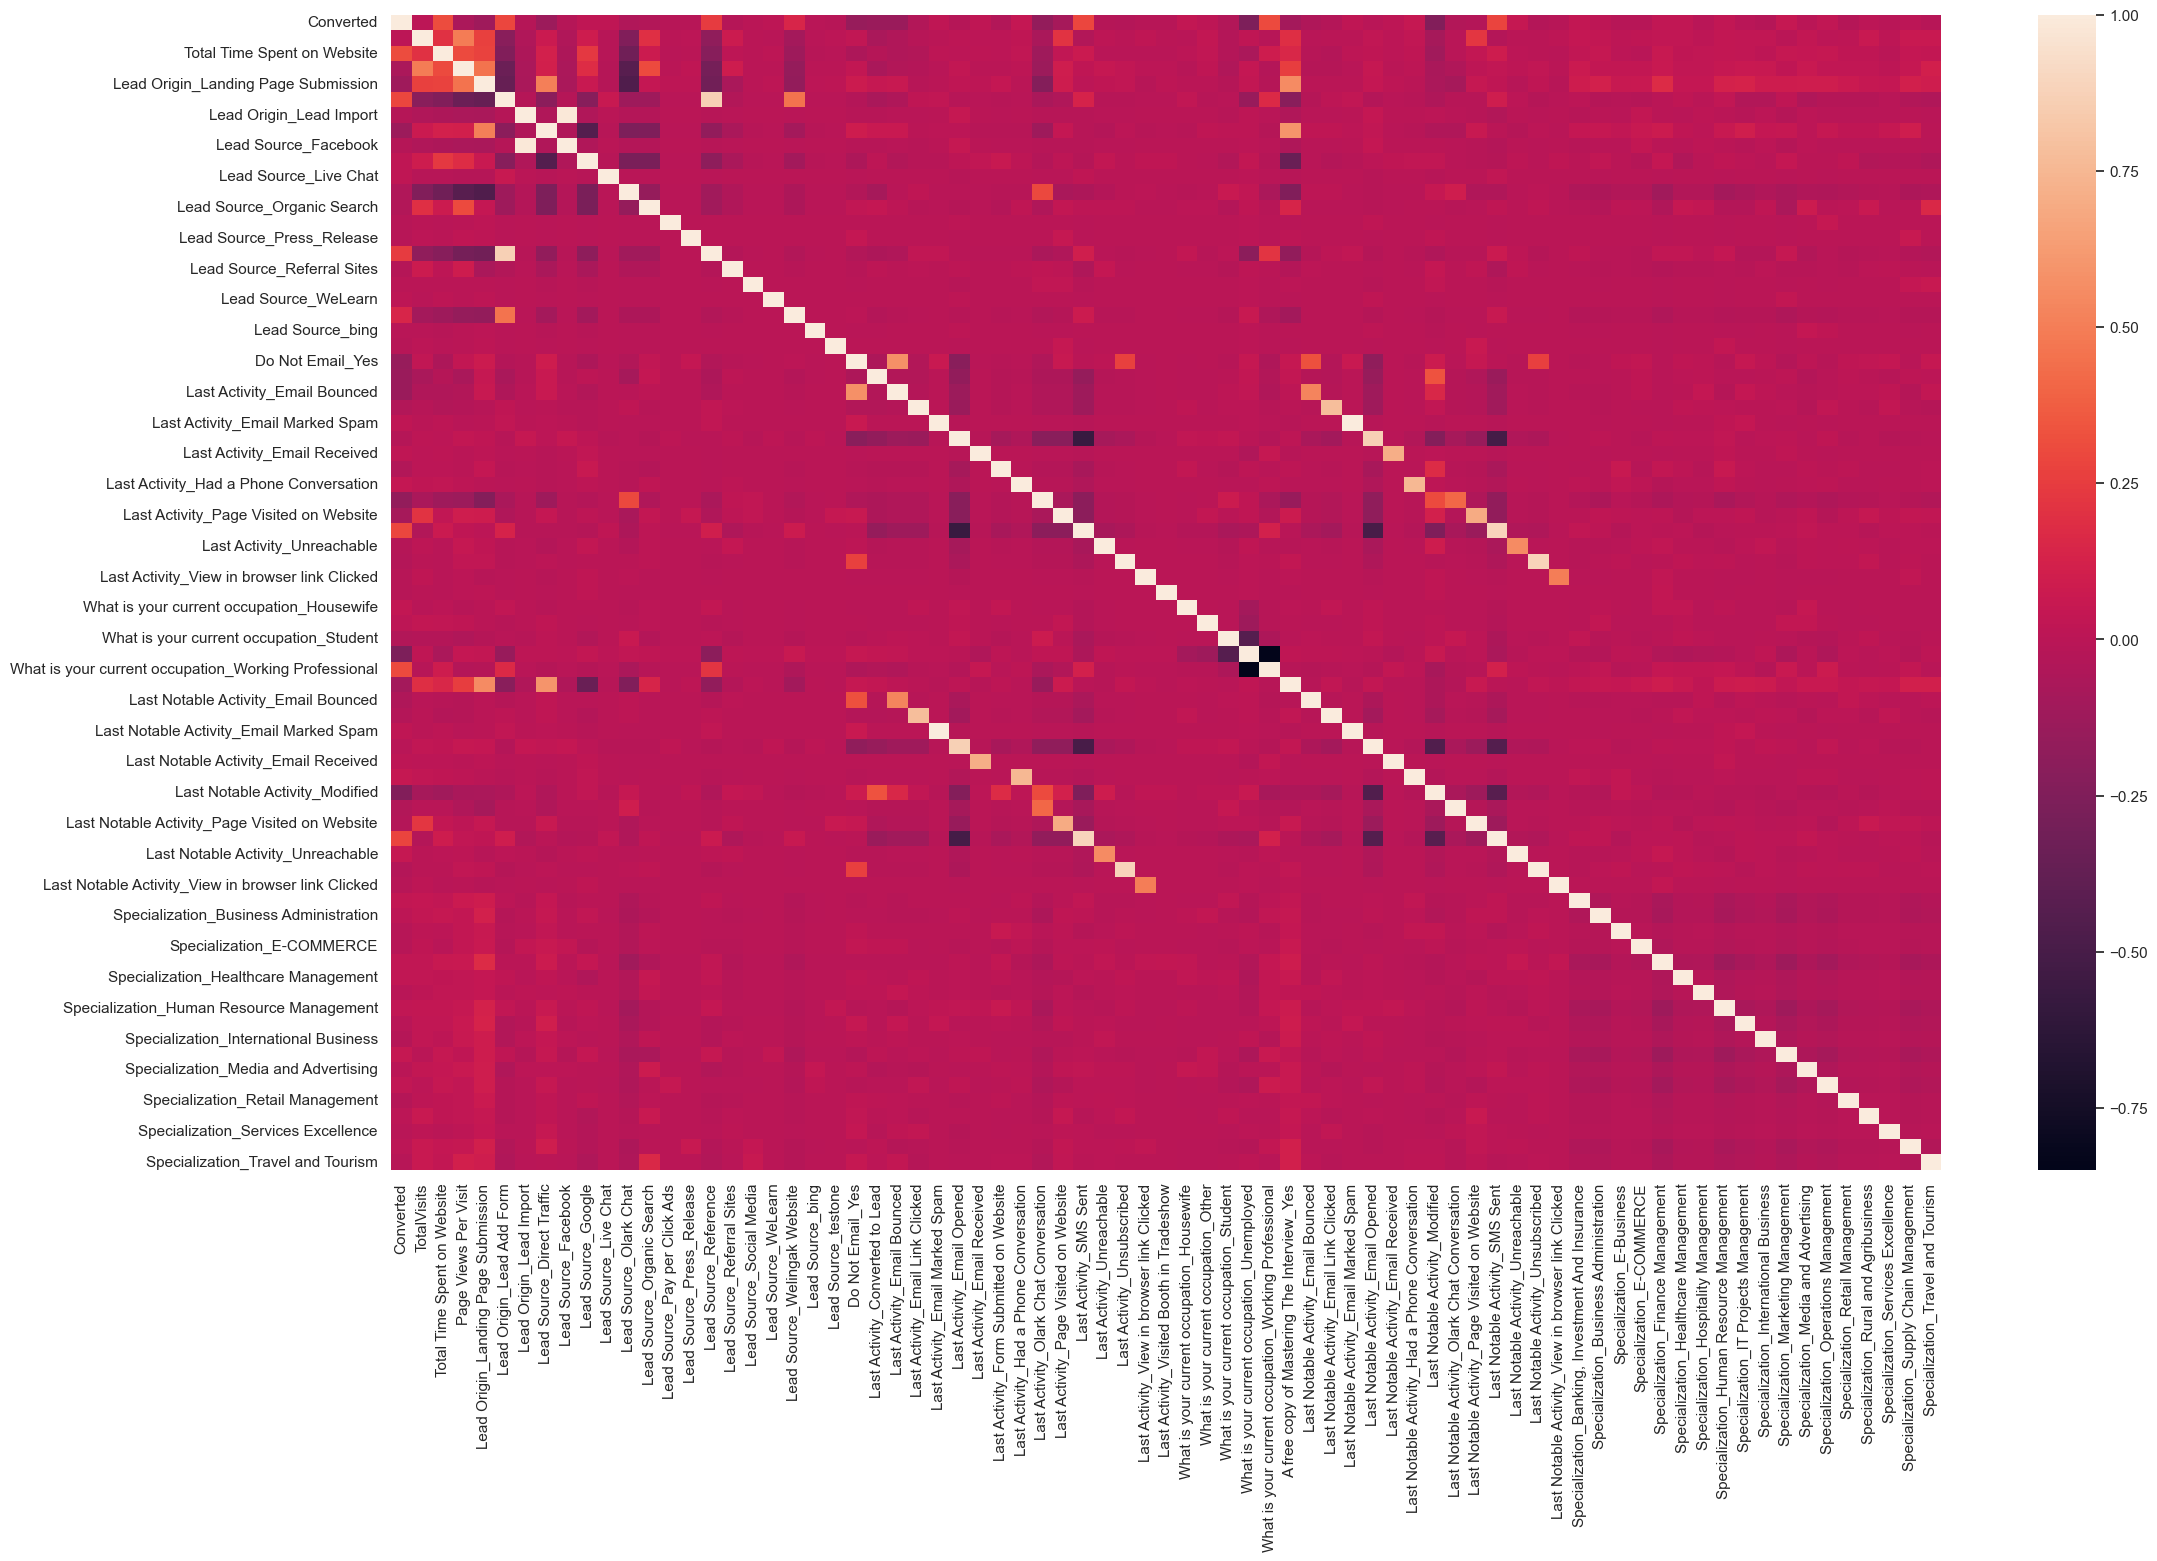

In [79]:
plt.figure(figsize = (25,15))
sns.heatmap(leads.corr())
plt.show()

# # Model Building

In [80]:
logreg = LogisticRegression()

In [83]:
rfe = RFE(logreg,n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [84]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Lead Origin_Landing Page Submission', False, 23),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 49),
 ('Lead Source_Direct Traffic', False, 6),
 ('Lead Source_Facebook', False, 39),
 ('Lead Source_Google', False, 10),
 ('Lead Source_Live Chat', False, 46),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 9),
 ('Lead Source_Pay per Click Ads', False, 41),
 ('Lead Source_Press_Release', False, 58),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 38),
 ('Lead Source_Social Media', False, 32),
 ('Lead Source_WeLearn', False, 48),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 52),
 ('Lead Source_testone', False, 40),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 8),
 ('Last Activity_Email Bounced', False, 7),
 ('Last Activity_Email Link Clic

In [85]:
col = X_train.columns[rfe.support_]

In [86]:
X_train = X_train[col]

# # Model 1

In [87]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2061.6
Date:                Tue, 23 Jul 2024   Deviance:                       4123.2
Time:                        00:10:30   Pearson chi2:                 4.76e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3692
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1802      0.707     -1.669      0.095      -2.566       0.206
TotalVisits                                              5.5019      1.268      4.338      0.000       3.016       7.988
Total Time Spent on Website                              4.4509      0.185     24.033      0.000       4.088       4.814
Lead Origin_Lead Add Form                                2.4955      0.886      2.817      0.005       0.759       4.232
Lead Source_Olark Chat                                   1.6937      0.129     13.108      0.000       1.440       1.947
Lead Source_Reference                                    1.3387      0.911      1.470      0.142      -0.447       3.124
Lead Source_Welingak Website                             3.8319      1.340      2.859      0.004       1.205       6.459
Do Not Email_Yes                                        -1.3024      0.179     -7.260      0.000      -1.654      -0.951
Last Activity_Olark Chat Conversation                   -1.2124      0.186     -6.525      0.000      -1.577      -0.848
Last Activity_SMS Sent                                   1.1332      0.083     13.574      0.000       0.970       1.297
What is your current occupation_Housewife               22.7851   2.59e+04      0.001      0.999   -5.08e+04    5.08e+04
What is your current occupation_Student                 -1.2297      0.733     -1.678      0.093      -2.666       0.207
What is your current occupation_Unemployed              -1.1056      0.701     -1.577      0.115      -2.480       0.269
What is your current occupation_Working Professional     1.5013      0.725      2.070      0.038       0.080       2.923
Last Notable Activity_Had a Phone Conversation          23.6811   2.34e+04      0.001      0.999   -4.59e+04    4.59e+04
Last Notable Activity_Unreachable                        3.3414      1.071      3.120      0.002       1.243       5.440
========================================================================================================================
"""

##Checking VIF

In [88]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,52.23
4,Lead Source_Reference,40.99
5,Lead Source_Welingak Website,12.29
11,What is your current occupation_Unemployed,4.34
1,Total Time Spent on Website,2.42
0,TotalVisits,2.24
12,What is your current occupation_Working Professional,1.68
8,Last Activity_SMS Sent,1.64
3,Lead Source_Olark Chat,1.59
7,Last Activity_Olark Chat Conversation,1.22


In [89]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

# #Model2

In [90]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2062.5
Date:                Tue, 23 Jul 2024   Deviance:                       4125.1
Time:                        00:11:48   Pearson chi2:                 4.75e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3690
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1775      0.707     -1.667      0.096      -2.562       0.207
TotalVisits                                              5.4959      1.268      4.334      0.000       3.011       7.981
Total Time Spent on Website                              4.4493      0.185     24.023      0.000       4.086       4.812
Lead Origin_Lead Add Form                                3.7720      0.233     16.166      0.000       3.315       4.229
Lead Source_Olark Chat                                   1.6920      0.129     13.088      0.000       1.439       1.945
Lead Source_Welingak Website                             2.5546      1.032      2.476      0.013       0.533       4.577
Do Not Email_Yes                                        -1.3008      0.179     -7.256      0.000      -1.652      -0.949
Last Activity_Olark Chat Conversation                   -1.2115      0.186     -6.521      0.000      -1.576      -0.847
Last Activity_SMS Sent                                   1.1340      0.083     13.587      0.000       0.970       1.298
What is your current occupation_Housewife               22.7901    2.6e+04      0.001      0.999   -5.09e+04    5.09e+04
What is your current occupation_Student                 -1.2284      0.732     -1.678      0.093      -2.664       0.207
What is your current occupation_Unemployed              -1.1080      0.701     -1.581      0.114      -2.481       0.265
What is your current occupation_Working Professional     1.5014      0.725      2.072      0.038       0.081       2.922
Last Notable Activity_Had a Phone Conversation          23.6819   2.34e+04      0.001      0.999   -4.59e+04    4.59e+04
Last Notable Activity_Unreachable                        3.3417      1.071      3.121      0.002       1.243       5.440
========================================================================================================================
"""

In [91]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,4.33
1,Total Time Spent on Website,2.42
0,TotalVisits,2.24
2,Lead Origin_Lead Add Form,1.75
11,What is your current occupation_Working Professional,1.67
7,Last Activity_SMS Sent,1.64
3,Lead Source_Olark Chat,1.59
4,Lead Source_Welingak Website,1.31
6,Last Activity_Olark Chat Conversation,1.22
9,What is your current occupation_Student,1.13


In [92]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

# #Model 3

In [93]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2068.5
Date:                Tue, 23 Jul 2024   Deviance:                       4137.0
Time:                        00:12:40   Pearson chi2:                 4.76e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3673
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1748      0.707     -1.663      0.096      -2.560       0.210
TotalVisits                                              5.4840      1.267      4.330      0.000       3.002       7.966
Total Time Spent on Website                              4.4504      0.185     24.064      0.000       4.088       4.813
Lead Origin_Lead Add Form                                3.7650      0.233     16.143      0.000       3.308       4.222
Lead Source_Olark Chat                                   1.6860      0.129     13.061      0.000       1.433       1.939
Lead Source_Welingak Website                             2.5556      1.032      2.477      0.013       0.534       4.578
Do Not Email_Yes                                        -1.3057      0.179     -7.287      0.000      -1.657      -0.955
Last Activity_Olark Chat Conversation                   -1.2179      0.186     -6.556      0.000      -1.582      -0.854
Last Activity_SMS Sent                                   1.1253      0.083     13.497      0.000       0.962       1.289
What is your current occupation_Housewife               21.7884   1.58e+04      0.001      0.999   -3.09e+04    3.09e+04
What is your current occupation_Student                 -1.2268      0.732     -1.675      0.094      -2.662       0.209
What is your current occupation_Unemployed              -1.1003      0.701     -1.570      0.116      -2.474       0.273
What is your current occupation_Working Professional     1.5079      0.725      2.081      0.037       0.087       2.928
Last Notable Activity_Unreachable                        3.3319      1.071      3.112      0.002       1.233       5.431
========================================================================================================================
"""

In [94]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

# #Model 4

In [95]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2070.5
Date:                Tue, 23 Jul 2024   Deviance:                       4141.1
Time:                        00:13:16   Pearson chi2:                 4.76e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3667
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.5144      0.637     -0.807      0.420      -1.764       0.735
TotalVisits                                              5.4079      1.262      4.285      0.000       2.934       7.882
Total Time Spent on Website                              4.4460      0.185     24.049      0.000       4.084       4.808
Lead Origin_Lead Add Form                                3.7639      0.233     16.151      0.000       3.307       4.221
Lead Source_Olark Chat                                   1.6809      0.129     13.035      0.000       1.428       1.934
Lead Source_Welingak Website                             2.5526      1.032      2.474      0.013       0.531       4.575
Do Not Email_Yes                                        -1.3086      0.179     -7.295      0.000      -1.660      -0.957
Last Activity_Olark Chat Conversation                   -1.2226      0.186     -6.578      0.000      -1.587      -0.858
Last Activity_SMS Sent                                   1.1244      0.083     13.488      0.000       0.961       1.288
What is your current occupation_Student                 -1.8819      0.668     -2.816      0.005      -3.192      -0.572
What is your current occupation_Unemployed              -1.7556      0.634     -2.771      0.006      -2.997      -0.514
What is your current occupation_Working Professional     0.8521      0.660      1.292      0.196      -0.441       2.145
Last Notable Activity_Unreachable                        3.3307      1.071      3.111      0.002       1.232       5.429
========================================================================================================================
"""

In [96]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

# # Model 4

In [97]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2071.3
Date:                Tue, 23 Jul 2024   Deviance:                       4142.6
Time:                        00:13:54   Pearson chi2:                 4.75e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3665
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2791      0.195      1.429      0.153      -0.104       0.662
TotalVisits                                    5.3717      1.261      4.260      0.000       2.900       7.843
Total Time Spent on Website                    4.4465      0.185     24.049      0.000       4.084       4.809
Lead Origin_Lead Add Form                      3.7621      0.233     16.145      0.000       3.305       4.219
Lead Source_Olark Chat                         1.6799      0.129     13.033      0.000       1.427       1.933
Lead Source_Welingak Website                   2.5529      1.032      2.475      0.013       0.531       4.575
Do Not Email_Yes                              -1.3071      0.179     -7.290      0.000      -1.659      -0.956
Last Activity_Olark Chat Conversation         -1.2250      0.186     -6.587      0.000      -1.589      -0.860
Last Activity_SMS Sent                         1.1271      0.083     13.532      0.000       0.964       1.290
What is your current occupation_Student       -2.6744      0.283     -9.449      0.000      -3.229      -2.120
What is your current occupation_Unemployed    -2.5487      0.185    -13.767      0.000      -2.912      -2.186
Last Notable Activity_Unreachable              3.3326      1.071      3.113      0.002       1.234       5.431
==============================================================================================================
"""

In [98]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,3.15
1,Total Time Spent on Website,2.05
0,TotalVisits,2.04
7,Last Activity_SMS Sent,1.55
3,Lead Source_Olark Chat,1.46
2,Lead Origin_Lead Add Form,1.45
4,Lead Source_Welingak Website,1.29
6,Last Activity_Olark Chat Conversation,1.21
8,What is your current occupation_Student,1.09
5,Do Not Email_Yes,1.08


# Model Evaluation

In [99]:
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

6195    0.051837
918     0.979474
7560    0.040114
6825    0.789015
3252    0.099283
4753    0.837987
6866    0.831549
5600    0.131007
542     0.062344
5992    0.434593
dtype: float64

In [100]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.05183721, 0.9794741 , 0.04011373, 0.78901488, 0.09928267,
       0.83798675, 0.83154876, 0.13100669, 0.06234435, 0.4345931 ])

In [101]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.051837
1,1,0.979474
2,0,0.040114
3,0,0.789015
4,0,0.099283


In [102]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.051837,0
1,1,0.979474,1
2,0,0.040114,0
3,0,0.789015,1
4,0,0.099283,0


Confusion Matrix

In [103]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1908  399]
 [ 563 1591]]


In [104]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7843532840170365


In [105]:

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [106]:
TP/(TP+FN)

0.7386258124419685

In [107]:
TP/(TP+FN)

0.7386258124419685

Optimal Cutoff

In [108]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [109]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted,
                    y_train_pred_final.Conversion_Prob, 
                                         drop_intermediate=False)

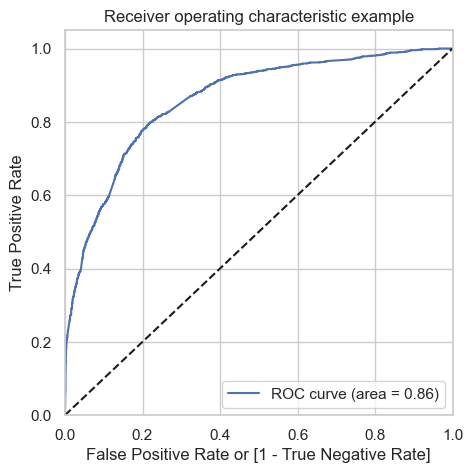

In [110]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [111]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.051837,0,1,0,0,0,0,0,0,0,0,0
1,1,0.979474,1,1,1,1,1,1,1,1,1,1,1
2,0,0.040114,0,1,0,0,0,0,0,0,0,0,0
3,0,0.789015,1,1,1,1,1,1,1,1,1,0,0
4,0,0.099283,0,1,0,0,0,0,0,0,0,0,0


In [112]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.482851  1.000000  0.000000
0.1   0.1  0.530374  0.995357  0.096229
0.2   0.2  0.715983  0.936397  0.510186
0.3   0.3  0.758574  0.901578  0.625054
0.4   0.4  0.786147  0.805942  0.767664
0.5   0.5  0.784353  0.738626  0.827048
0.6   0.6  0.769558  0.671773  0.860858
0.7   0.7  0.735934  0.545032  0.914174
0.8   0.8  0.707241  0.443361  0.953619
0.9   0.9  0.648285  0.290158  0.982661


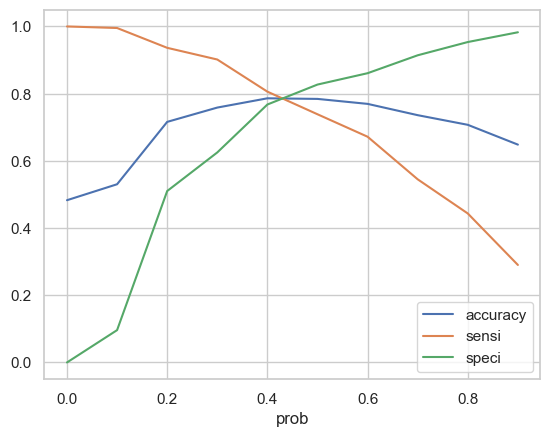

In [113]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [114]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.051837,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.979474,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.040114,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.789015,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.099283,0,1,0,0,0,0,0,0,0,0,0,0


In [115]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.788836583725622

In [116]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1813,  494],
       [ 448, 1706]], dtype=int64)

In [117]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [118]:
TP/(TP+FN)

0.7920148560817084

In [119]:
TN/(TN+FP)

0.7858690940615518

## Maing Predictions on the Test Set

In [120]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] =  scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])


In [121]:
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4382,0.113043,0.646567,0,0,0,0,0,0,1,0,0,1,0,0,0
8865,0.034783,0.590229,0,0,0,0,0,0,1,0,0,1,0,0,0
773,0.026087,0.119278,0,0,0,0,0,0,0,0,0,1,0,0,0
2787,0.034783,0.464349,0,0,0,0,1,0,1,0,0,1,0,0,0
7107,0.017391,0.012764,0,0,0,0,0,0,0,0,0,1,0,0,0


In [122]:
X_test_sm = sm.add_constant(X_test[col])

In [123]:
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4382,1.0,0.113043,0.646567,0,0,0,0,0,0,1,0,0,1,0,0,0
8865,1.0,0.034783,0.590229,0,0,0,0,0,0,1,0,0,1,0,0,0
773,1.0,0.026087,0.119278,0,0,0,0,0,0,0,0,0,1,0,0,0
2787,1.0,0.034783,0.464349,0,0,0,0,1,0,1,0,0,1,0,0,0
7107,1.0,0.017391,0.012764,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8728,1.0,0.017391,0.448504,0,0,0,0,0,0,1,0,0,1,0,0,0
38,1.0,0.017391,0.136444,0,0,0,0,0,0,0,0,0,1,0,0,0
4368,1.0,0.026087,0.174296,0,0,0,0,0,0,0,0,1,0,0,0,0
4712,1.0,0.034783,0.007042,0,0,0,0,0,0,0,0,0,1,0,0,0


In [124]:
X_test.drop(['Lead Source_Reference', 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 
                     'Last Notable Activity_Had a Phone Conversation'], 1, 
                                inplace = True)

In [125]:
y_test_pred = res.predict(sm.add_constant(X_test))

In [126]:
y_test_pred[:10]

4382    0.912112
8865    0.841415
773     0.168115
2787    0.450650
7107    0.107228
6498    0.073607
2458    0.994361
8487    0.182287
6211    0.469741
7294    0.101939
dtype: float64

In [127]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [128]:
y_pred_1.head()

,0
4382,0.912112
8865,0.841415
773,0.168115
2787,0.450650
7107,0.107228


In [129]:
y_test_df = pd.DataFrame(y_test)

In [130]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [131]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [132]:
y_pred_final.head()

,Converted,0
0,1,0.912112
1,1,0.841415
2,0,0.168115
3,1,0.450650
4,0,0.107228


In [133]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [134]:
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.912112
1,1,0.841415
2,0,0.168115
3,1,0.450650
4,0,0.107228


In [135]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)


In [136]:
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.912112,1
1,1,0.841415,1
2,0,0.168115,0
3,1,0.450650,1
4,0,0.107228,0


In [137]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)


0.7855648535564853

In [138]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[779, 222],
       [188, 723]], dtype=int64)

In [139]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [140]:
TP / float(TP+FN)

0.7936333699231614

In [141]:
TN / float(TN+FP)

0.7782217782217782

### Precision-Recall View

In [142]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[1908,  399],
       [ 563, 1591]], dtype=int64)

In [143]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.799497487437186

In [144]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7386258124419685

In [145]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       1
 2       0
 3       0
 4       0
        ..
 4456    0
 4457    1
 4458    0
 4459    1
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       1
 2       0
 3       1
 4       0
        ..
 4456    1
 4457    1
 4458    0
 4459    0
 4460    1
 Name: Predicted, Length: 4461, dtype: int64)

In [146]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

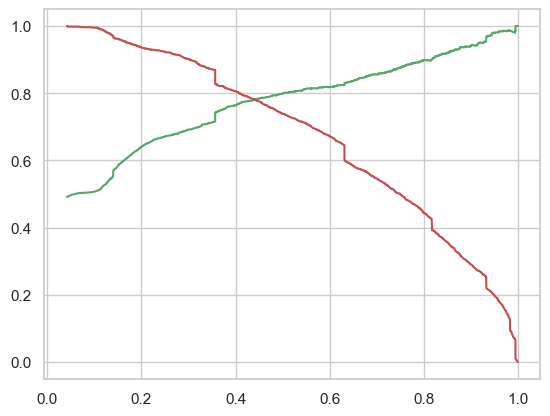

In [147]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [148]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.051837,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.979474,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.040114,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.789015,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.099283,0,1,0,0,0,0,0,0,0,0,0,0


In [149]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)


0.7883882537547635

In [150]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1833,  474],
       [ 470, 1684]], dtype=int64)

In [151]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

### Precision

In [152]:
TP/(TP+FP)


0.7803521779425394

### Recall

In [153]:
TP/(TP+FN)

0.7818012999071495

In [154]:
y_test_pred = res.predict(sm.add_constant(X_test))

In [155]:
y_test_pred[:10]

4382    0.912112
8865    0.841415
773     0.168115
2787    0.450650
7107    0.107228
6498    0.073607
2458    0.994361
8487    0.182287
6211    0.469741
7294    0.101939
dtype: float64

In [156]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [157]:
y_pred_1.head()

,0
4382,0.912112
8865,0.841415
773,0.168115
2787,0.450650
7107,0.107228


In [158]:
y_test_df = pd.DataFrame(y_test)

In [159]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [160]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [161]:
y_pred_final.head()

,Converted,0
0,1,0.912112
1,1,0.841415
2,0,0.168115
3,1,0.450650
4,0,0.107228


In [162]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [163]:
y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.912112
1,1,0.841415
2,0,0.168115
3,1,0.450650
4,0,0.107228


In [164]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)


In [165]:
y_pred_final.head()


,Converted,Conversion_Prob,final_predicted
0,1,0.912112,1
1,1,0.841415,1
2,0,0.168115,0
3,1,0.450650,1
4,0,0.107228,0


In [166]:
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)


0.7850418410041841

In [167]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[798, 203],
       [208, 703]], dtype=int64)

In [168]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [169]:
TP/(TP+FP)

0.7759381898454746

In [171]:
TP/(TP+FN)

0.7716794731064764

## Conclusion

It was found that the variables that mattered the most in the potential buyers are (In descending order) :

1.The total time spend on the Website.
2.Total number of visits.
3.When the lead source was:
  a. Google
  b. Direct traffic
  c. Organic search
  d. Welingak website
4.When the last activity was:
  a. SMS
  b. Olark chat conversation
5.When the lead origin is Lead add format.
6.When their current occupation is as a working professional.
Keeping these in mind the X Education can flourish as they have a very high chance to get almost all the potential buyers to change their mind and buy their courses.